In [3]:
using DataFrames
using Gadfly
using Compose
set_default_plot_size(30cm, 12cm)

# 4UET

## minimization

In [4]:
dir_uet_min="/home/german/labo/18/lbp/run/4uet/mhe/m"
uet_min_Etot = readdlm("$dir_uet_min/outputs/Etot_min");
uet_mmin_Etot = readdlm("$dir_uet_min/outputs/Etot_mmin");
df_uet_MIN_Etot = DataFrame(E=[uet_min_Etot[:, 2]; uet_mmin_Etot[:, 2]],
NSTEP=[uet_min_Etot[:, 1]; (uet_mmin_Etot[:, 1] .+ 500)]);

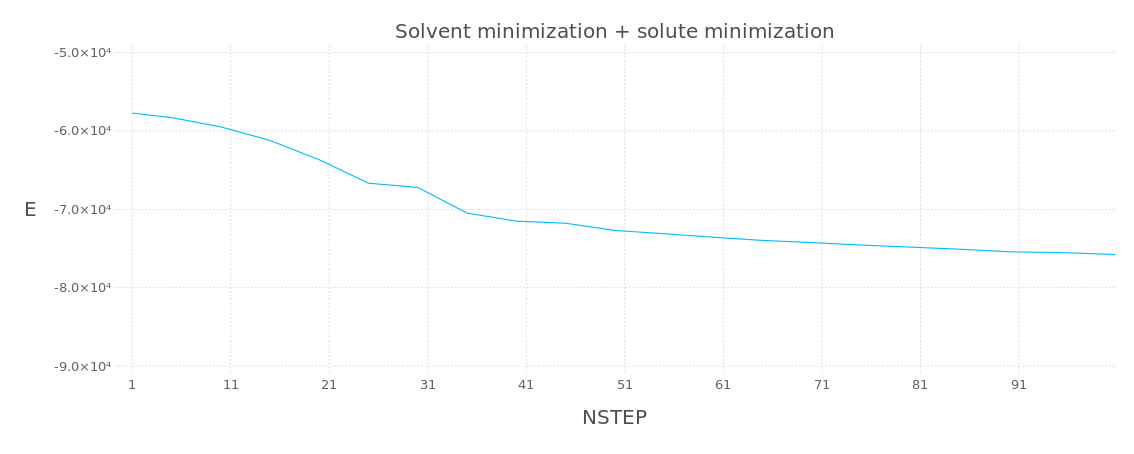

In [5]:
plot(df_uet_MIN_Etot, Geom.line, x="NSTEP", y="E",
Coord.Cartesian(xmin=0, xmax=100),
Guide.title("Solvent minimization + solute minimization"),
Guide.xticks(ticks = collect(1:10:100)),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt, key_title_font_size = 30pt))

## heat

In [6]:
# Energies
dir_uet_hea="/home/german/labo/18/lbp/run/4uet/mhe/h"
uet_hea_Ek = readdlm("$dir_uet_hea/outputs/ektot.dat");
uet_hea_Ep = readdlm("$dir_uet_hea/outputs/eptot.dat");
uet_hea_Etot = readdlm("$dir_uet_hea/outputs/etot.dat");

df_uet_HEA_E = DataFrame(E=[uet_hea_Ek[:, 2]; uet_hea_Ep[:, 2]; uet_hea_Etot[:, 2]],
NSTEP=[uet_hea_Ek[:, 1]; uet_hea_Ep[:, 1]; uet_hea_Etot[:, 1]];
Type=repeat(["Ek"; "Ep"; "Etot"], inner=[length(uet_hea_Ek[:, 1])]));

# Temperature
uet_hea_T = readdlm("$dir_uet_hea/outputs/temp.dat");
df_uet_HEA_T = DataFrame(Temperature=uet_hea_T[:, 2],
NSTEP=uet_hea_T[:, 1]);

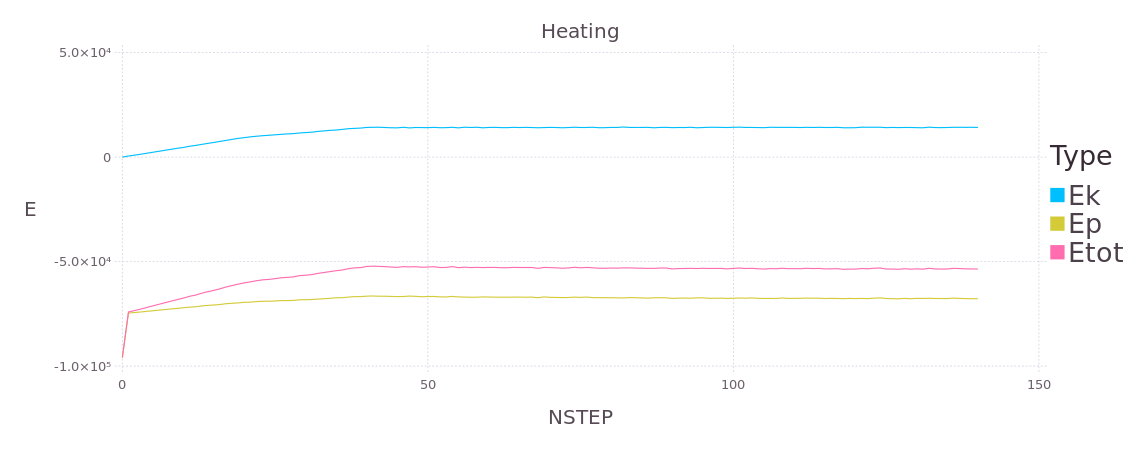

In [7]:
plot(df_uet_HEA_E, Geom.line, x="NSTEP", y="E", color="Type",
Guide.title("Heating"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

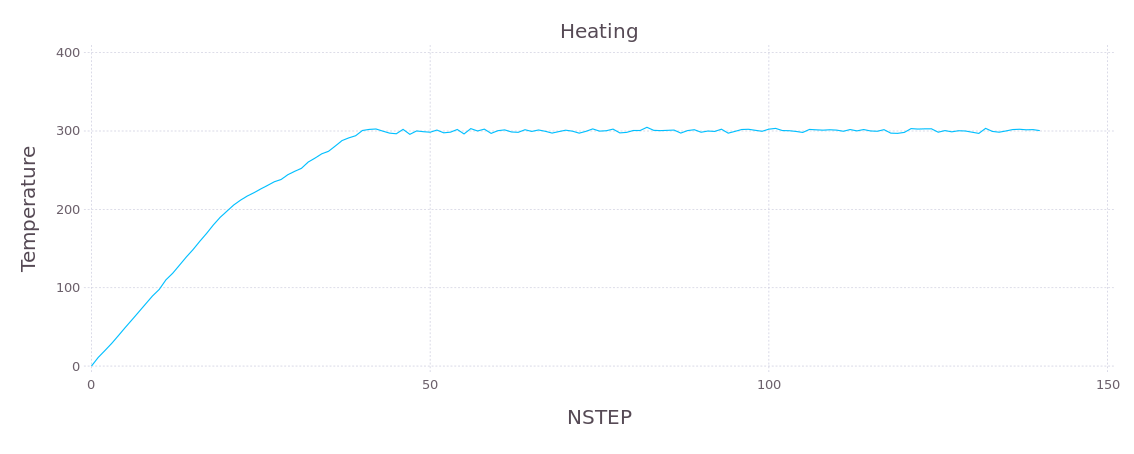

In [8]:
plot(df_uet_HEA_T, Geom.line, x="NSTEP", y="Temperature",
Guide.title("Heating"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

## equilibration

In [22]:
# Energies
dir_uet_equ="/home/german/labo/18/lbp/run/4uet/mhe/e"
uet_equ_Ek = readdlm("$dir_uet_equ/outputs/ektot.dat");
uet_equ_Ep = readdlm("$dir_uet_equ/outputs/eptot.dat");
uet_equ_Etot = readdlm("$dir_uet_equ/outputs/etot.dat");

df_uet_EQU_E = DataFrame(E=[uet_equ_Ek[:, 2]; uet_equ_Ep[:, 2]; uet_equ_Etot[:, 2]],
NSTEP=[uet_equ_Ek[:, 1]; uet_equ_Ep[:, 1]; uet_equ_Etot[:, 1]];
Type=repeat(["Ek"; "Ep"; "Etot"], inner=[length(uet_equ_Ek[:, 1])]));

# Temperature
uet_equ_T = readdlm("$dir_uet_equ/outputs/temp.dat");
df_uet_EQU_T = DataFrame(Temperature=uet_equ_T[:, 2],
NSTEP=uet_equ_T[:, 1]);

# RMSD ntwx=500
uet_equ_rmsd = readdlm("$dir_uet_equ/rmsd_equ_4uet");
df_uet_EQU_RMSD = DataFrame(RMSD=uet_equ_rmsd[:, 2], Frame=uet_equ_rmsd[:, 1]);

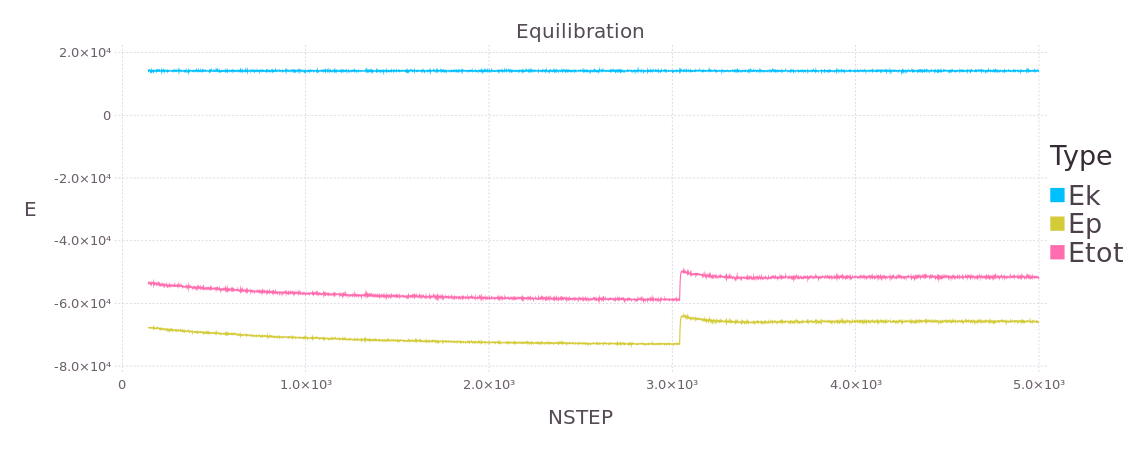

In [23]:
plot(df_uet_EQU_E, Geom.line, x="NSTEP", y="E", color="Type",
Guide.title("Equilibration"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

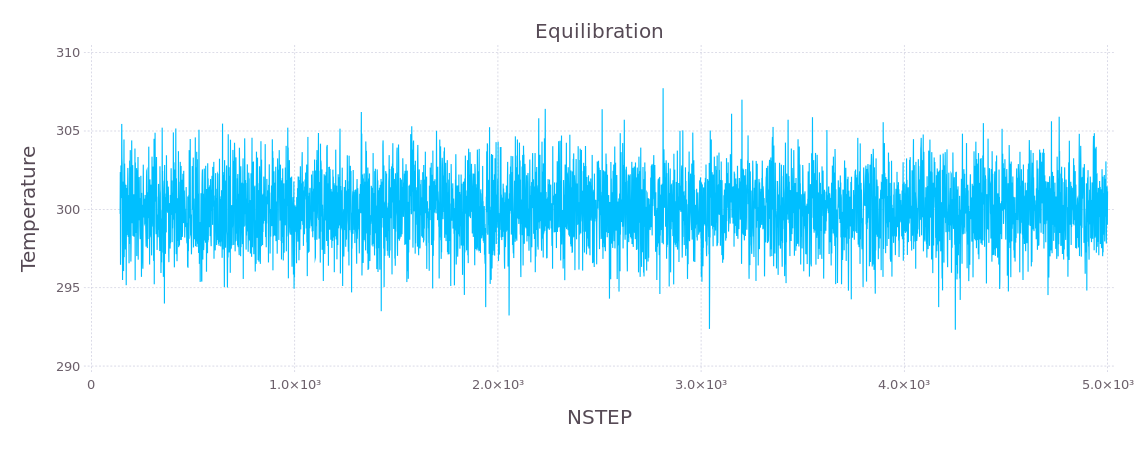

In [11]:
plot(df_uet_EQU_T, Geom.line, x="NSTEP", y="Temperature",
Guide.title("Equilibration"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

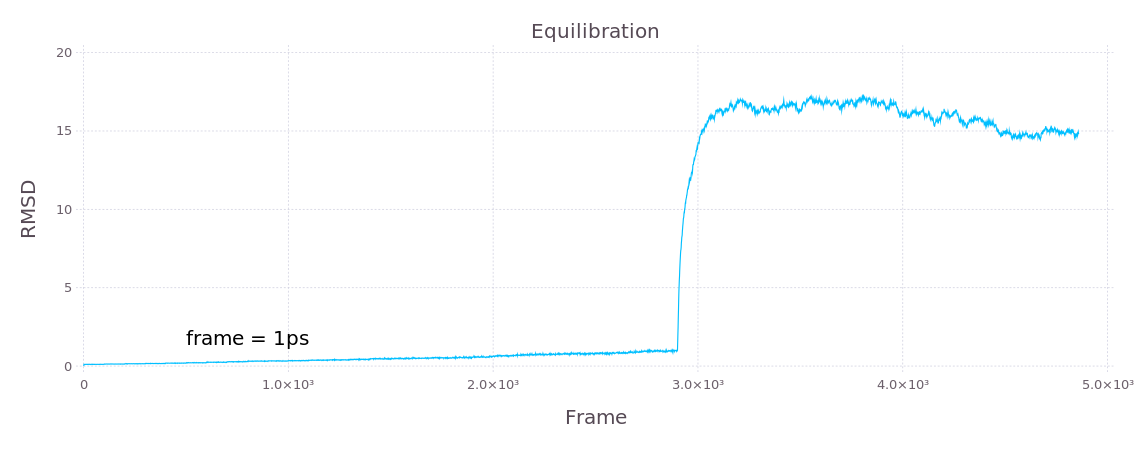

In [24]:
# Escribo c/ 1ps
plot(df_uet_EQU_RMSD, Geom.line, x="Frame", y="RMSD",
Guide.title("Equilibration"),
Guide.annotation(compose(compose(context(), text(500, 1.0, "frame = 1ps")), fontsize(15pt), fill("black"))),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

### production

# Energies
dir_uet_pdt = "/home/german/labo/18/lbp/run/4uet"
uet_pdt_Ek = readdlm("$dir_uet_pdt/data/outputs/ektot.dat");
uet_pdt_Ep = readdlm("$dir_uet_pdt/data/outputs/eptot.dat");
uet_pdt_Etot = readdlm("$dir_uet_pdt/data/outputs/etot.dat");
df_uet_PDT_E = DataFrame(E=[uet_pdt_Ek[:, 2]; uet_pdt_Ep[:, 2]; uet_pdt_Etot[:, 2]],
NSTEP=[uet_pdt_Ek[:, 1]; uet_pdt_Ep[:, 1]; uet_pdt_Etot[:, 1]];
Type=repeat(["Ek"; "Ep"; "Etot"], inner=[length(uet_pdt_Ek[:, 1])]));

# Temperature
uet_pdt_T = readdlm("$dir_uet_pdt/data/outputs/temp.dat");
df_uet_PDT_T = DataFrame(Temperature=uet_pdt_T[:, 2],
NSTEP=uet_pdt_T[:, 1]);

# RMSD 
uet_pdt_rmsd = readdlm("$dir_uet_pdt/data/rmsd_uet");
df_uet_PDT_RMSD = DataFrame(RMSD=uet_pdt_rmsd[:, 2], Frame=uet_pdt_rmsd[:, 1]);

plot(df_uet_PDT_E, Geom.line, x="NSTEP", y="E", color="Type",
Guide.title("Production"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))                                                        

plot(df_uet_PDT_T, Geom.line, x="NSTEP", y="Temperature",
Guide.title("Production"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

pdf_uet_PDT_RMSD = plot(df_uet_PDT_RMSD, Geom.line, x="Frame", y="RMSD",
Guide.title("Production"),
Guide.annotation(compose(compose(context(), text(70000, 3.5, "frame = 10ps")), fontsize(15pt), fill("black"))),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

# 4XCP

## minimization

In [13]:
dir_xcp_min="/home/german/labo/18/lbp/run/4xcp/mhe/m"
xcp_min_Etot = readdlm("$dir_xcp_min/outputs/Etot_min");
xcp_mmin_Etot = readdlm("$dir_xcp_min/outputs/Etot_mmin");
df_xcp_MIN_Etot = DataFrame(E=[xcp_min_Etot[:, 2]; xcp_mmin_Etot[:, 2]],
NSTEP=[xcp_min_Etot[:, 1]; (xcp_mmin_Etot[:, 1] .+ 500)]);

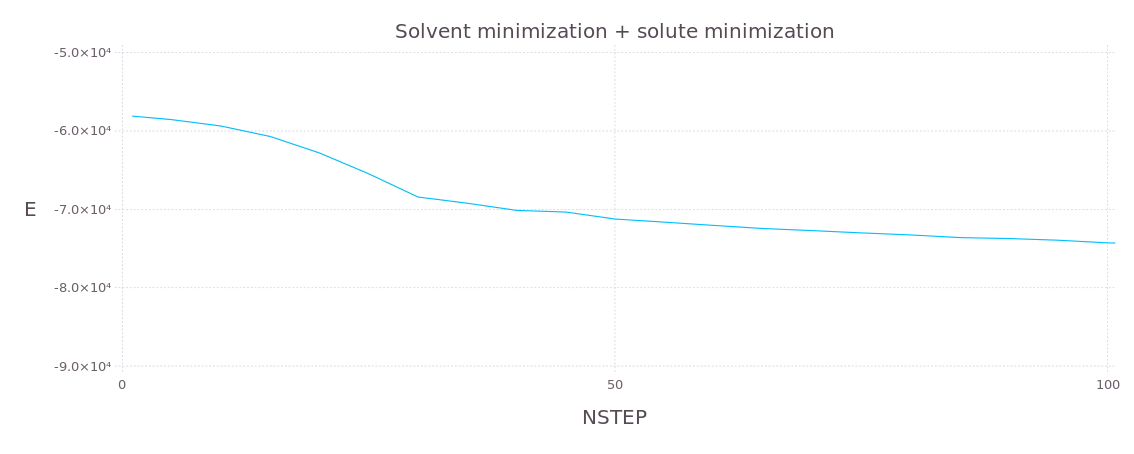

In [14]:
plot(df_xcp_MIN_Etot, Geom.line, x="NSTEP", y="E",
Coord.Cartesian(xmin=0, xmax=100),
Guide.title("Solvent minimization + solute minimization"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt, key_title_font_size = 30pt))

## heat

In [15]:
# Energies
dir_xcp_hea="/home/german/labo/18/lbp/run/4xcp/mhe/h"
xcp_hea_Ek = readdlm("$dir_xcp_hea/outputs/ektot.dat");
xcp_hea_Ep = readdlm("$dir_xcp_hea/outputs/eptot.dat");
xcp_hea_Etot = readdlm("$dir_xcp_hea/outputs/etot.dat");

df_xcp_HEA_E = DataFrame(E=[xcp_hea_Ek[:, 2]; xcp_hea_Ep[:, 2]; xcp_hea_Etot[:, 2]],
NSTEP=[xcp_hea_Ek[:, 1]; xcp_hea_Ep[:, 1]; xcp_hea_Etot[:, 1]];
Type=repeat(["Ek"; "Ep"; "Etot"], inner=[length(xcp_hea_Ek[:, 1])]));

# Temperature
xcp_hea_T = readdlm("$dir_xcp_hea/outputs/temp.dat");
df_xcp_HEA_T = DataFrame(Temperature=xcp_hea_T[:, 2],
NSTEP=xcp_hea_T[:, 1]);

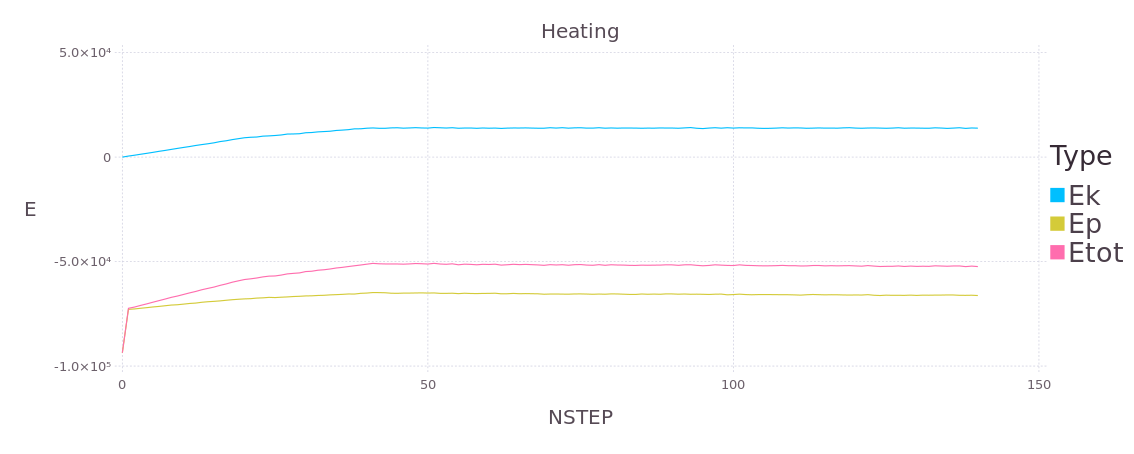

In [16]:
plot(df_xcp_HEA_E, Geom.line, x="NSTEP", y="E", color="Type",
Guide.title("Heating"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

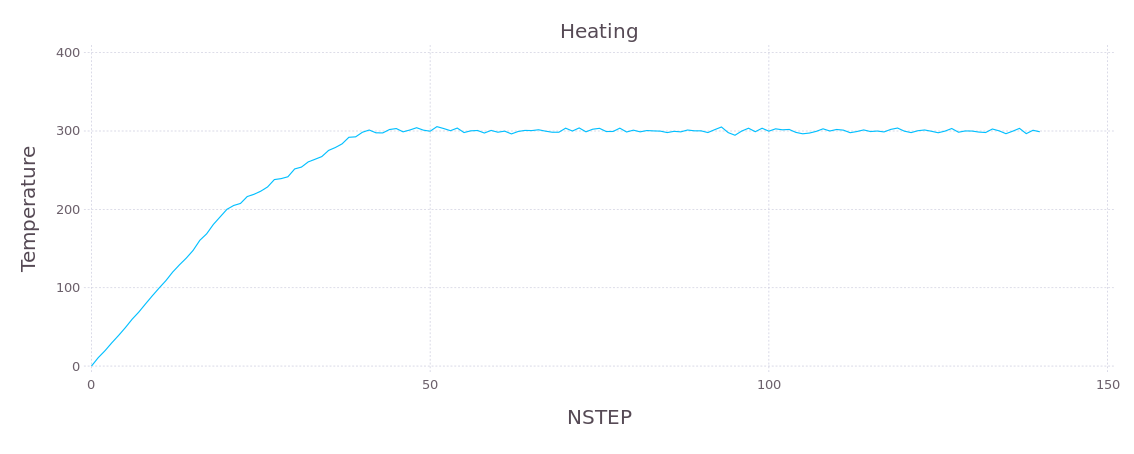

In [17]:
plot(df_xcp_HEA_T, Geom.line, x="NSTEP", y="Temperature",
Guide.title("Heating"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

## equilibration

In [25]:
# Energies
dir_xcp_equ="/home/german/labo/18/lbp/run/4xcp/mhe/e"
xcp_equ_Ek = readdlm("$dir_xcp_equ/outputs/ektot.dat");
xcp_equ_Ep = readdlm("$dir_xcp_equ/outputs/eptot.dat");
xcp_equ_Etot = readdlm("$dir_xcp_equ/outputs/etot.dat");

df_xcp_EQU_E = DataFrame(E=[xcp_equ_Ek[:, 2]; xcp_equ_Ep[:, 2]; xcp_equ_Etot[:, 2]],
NSTEP=[xcp_equ_Ek[:, 1]; xcp_equ_Ep[:, 1]; xcp_equ_Etot[:, 1]];
Type=repeat(["Ek"; "Ep"; "Etot"], inner=[length(xcp_equ_Ek[:, 1])]));

# Temperature
xcp_equ_T = readdlm("$dir_xcp_equ/outputs/temp.dat");
df_xcp_EQU_T = DataFrame(Temperature=xcp_equ_T[:, 2],
NSTEP=xcp_equ_T[:, 1]);

# RMSD ntwx=500
xcp_equ_rmsd = readdlm("$dir_xcp_equ/rmsd_equ_4xcp");
df_xcp_EQU_RMSD = DataFrame(RMSD=xcp_equ_rmsd[:, 2], Frame=xcp_equ_rmsd[:, 1]);

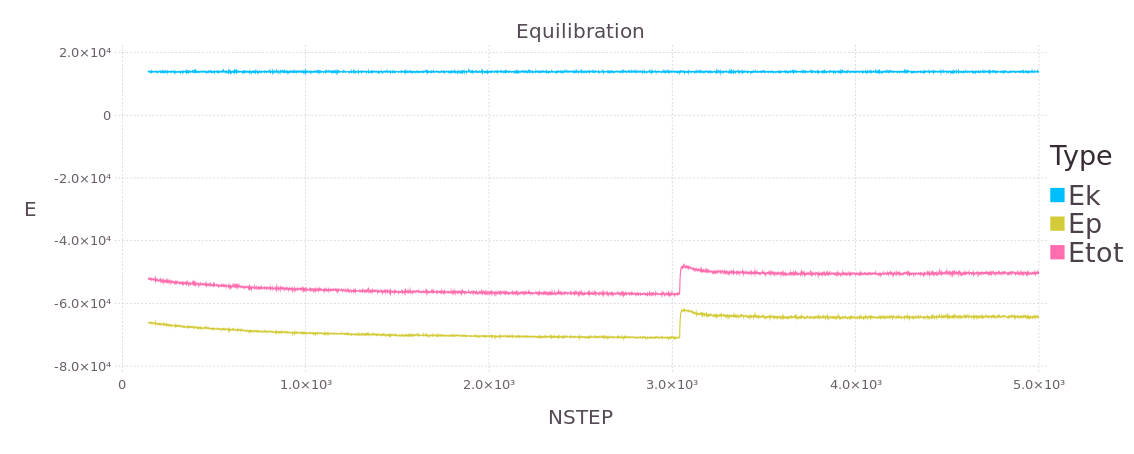

In [26]:
plot(df_xcp_EQU_E, Geom.line, x="NSTEP", y="E", color="Type",
Guide.title("Equilibration"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

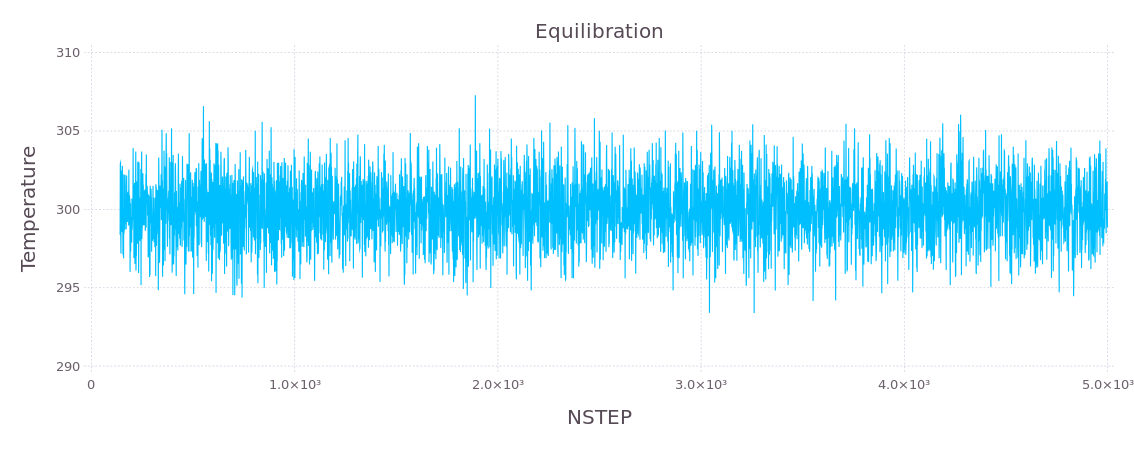

In [20]:
plot(df_xcp_EQU_T, Geom.line, x="NSTEP", y="Temperature",
Guide.title("Equilibration"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

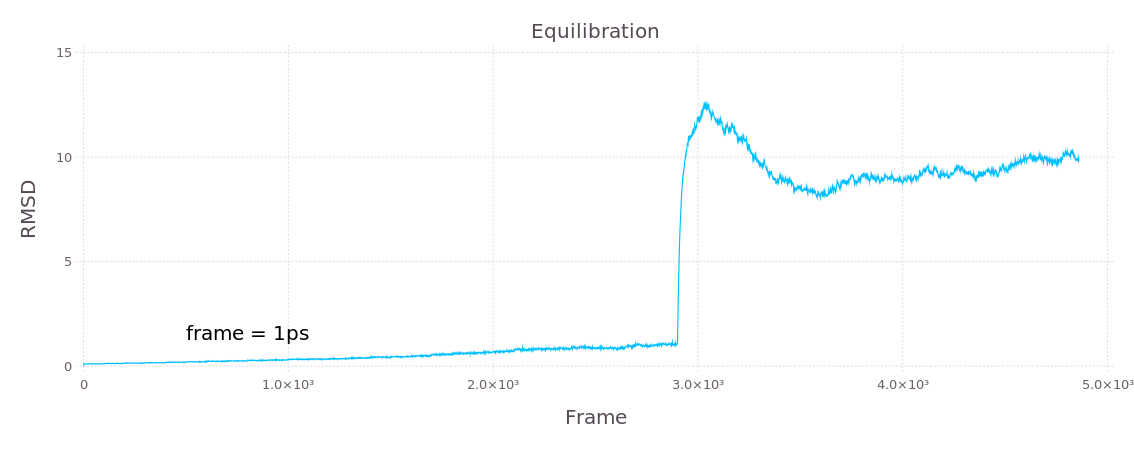

In [27]:
# Escribo c/ 1ps
plot(df_xcp_EQU_RMSD, Geom.line, x="Frame", y="RMSD",
Guide.title("Equilibration"),
Guide.annotation(compose(compose(context(), text(500, 1.0, "frame = 1ps")), fontsize(15pt), fill("black"))),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

In [ ]:
df_xcp_EQU_RMSD

### production

# Energies
dir_xcp_pdt = "/home/german/labo/18/lbp/run/4xcp"
xcp_pdt_Ek = readdlm("$dir_xcp_pdt/data/outputs/ektot.dat");
xcp_pdt_Ep = readdlm("$dir_xcp_pdt/data/outputs/eptot.dat");
xcp_pdt_Etot = readdlm("$dir_xcp_pdt/data/outputs/etot.dat");
df_xcp_PDT_E = DataFrame(E=[xcp_pdt_Ek[:, 2]; xcp_pdt_Ep[:, 2]; xcp_pdt_Etot[:, 2]],
NSTEP=[xcp_pdt_Ek[:, 1]; xcp_pdt_Ep[:, 1]; xcp_pdt_Etot[:, 1]];
Type=repeat(["Ek"; "Ep"; "Etot"], inner=[length(xcp_pdt_Ek[:, 1])]));

# Temperature
xcp_pdt_T = readdlm("$dir_xcp_pdt/data/outputs/temp.dat");
df_xcp_PDT_T = DataFrame(Temperature=xcp_pdt_T[:, 2],
NSTEP=xcp_pdt_T[:, 1]);

# RMSD 
xcp_pdt_rmsd = readdlm("$dir_xcp_pdt/data/rmsd_xcp");
df_xcp_PDT_RMSD = DataFrame(RMSD=xcp_pdt_rmsd[:, 2], Frame=xcp_pdt_rmsd[:, 1]);

plot(df_xcp_PDT_E, Geom.line, x="NSTEP", y="E", color="Type",
Guide.title("Production"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))                                                        

plot(df_xcp_PDT_T, Geom.line, x="NSTEP", y="Temperature",
Guide.title("Production"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

pdf_xcp_PDT_RMSD = plot(df_xcp_PDT_RMSD, Geom.line, x="Frame", y="RMSD",
Guide.title("Production"),
Guide.annotation(compose(compose(context(), text(70000, 1.5, "frame = 10ps")), fontsize(15pt), fill("black"))),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))